In [170]:
#imports
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

Available objects for config:
     AliasManager
     DisplayFormatter
     HistoryManager
     IPCompleter
     IPKernelApp
     InlineBackend
     LoggingMagics
     MagicsManager
     OSMagics
     PrefilterManager
     ScriptMagics
     StoreMagics
     ZMQInteractiveShell


In [171]:
#loading in dry bean data
df = pd.read_csv("C:/Users/twsoi/OneDrive - stevens.edu/Personal Projects/DryBeanDataset/Dry_Bean_Dataset.csv")
df = df.drop(['Class'], axis = 1)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [172]:
#standardize data to have mean of ~0 and variance of 1
X_std = StandardScaler().fit_transform(df)
X_std

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.4021726 ,
         1.92572347,  0.83837102],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089364,
         2.68970162,  0.77113831],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509111,
         1.84135576,  0.91675506],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920501,
         0.33632829,  0.39025106],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837456,
         0.2489734 ,  0.03644007],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777538,
        -0.27648141,  0.71371941]])

In [173]:
#Creating PCA instance
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X_std)

([<matplotlib.axis.XTick at 0x24ace4cad60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

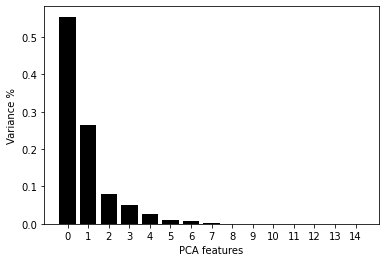

In [174]:
#Plotting explained variances: shows that the first two components explain the majority of the variance in the dry bean data
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color = 'black')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)

In [175]:
#save components to DataFrame
PCA_components = pd.DataFrame(principalComponents)
PCA_components.iloc[:,:2]

,0,1
0,-4.981561,1.824697
1,-5.436792,2.932365
2,-4.758088,1.826884
3,-4.300541,2.003661
4,-6.349340,4.088205
...,...,...
13606,-1.125616,-0.441079
13607,-1.605011,0.495998
13608,-1.417515,0.141194
13609,-1.114666,-0.212679


Text(0, 0.5, 'PCA 2')

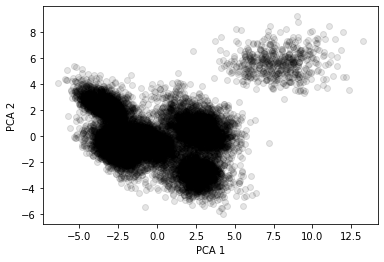

In [176]:
#visualize the first two components to notice if there are any clusters
plt.scatter(PCA_components[0], PCA_components[1], alpha = 0.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

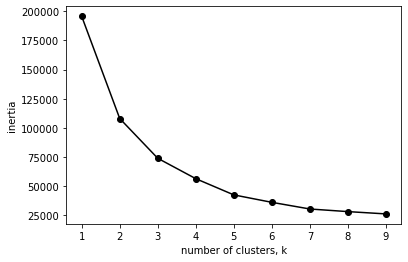

In [177]:
ks = range(1,10)
inertias = []

for k in ks:
    #create KMeans instance w/ k clusters
    model = KMeans(n_clusters=k)
    #fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    #append inertia to the interia list
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color = 'black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [178]:
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [179]:
PCA_components = PCA_components.iloc[:,:2]
y_predicted = km.fit_predict(PCA_components)
y_predicted

array([4, 4, 4, ..., 0, 0, 0])

In [180]:
PCA_components["cluster"] = y_predicted
PCA_components

,0,1,cluster
0,-4.981561,1.824697,4
1,-5.436792,2.932365,4
2,-4.758088,1.826884,4
3,-4.300541,2.003661,4
4,-6.349340,4.088205,4
...,...,...,...
13606,-1.125616,-0.441079,0
13607,-1.605011,0.495998,0
13608,-1.417515,0.141194,0
13609,-1.114666,-0.212679,0


In [181]:
km.cluster_centers_

array([[-1.56733639, -0.60666304],
       [ 2.60051215,  0.56106173],
       [ 2.49467255, -2.80180855],
       [ 7.75408017,  5.65453491],
       [-3.4374215 ,  2.16805872]])

Text(0, 0.5, 'PCA 2')

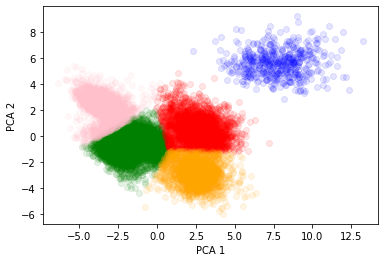

In [182]:
df1 = PCA_components[PCA_components.cluster==0]
df2 = PCA_components[PCA_components.cluster==1]
df3 = PCA_components[PCA_components.cluster==2]
df4 = PCA_components[PCA_components.cluster==3]
df5 = PCA_components[PCA_components.cluster==4]

plt.scatter(df1[0], df1[1], alpha = 0.1, color='green')
plt.scatter(df2[0], df2[1], alpha = 0.1, color='red')
plt.scatter(df3[0], df3[1], alpha = 0.1, color='orange')
plt.scatter(df4[0], df4[1], alpha = 0.1, color='blue')
plt.scatter(df5[0], df5[1], alpha = 0.1, color='pink')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [185]:
score = silhouette_score(PCA_components, km.labels_, metric='euclidean')
score

0.5890513646581456

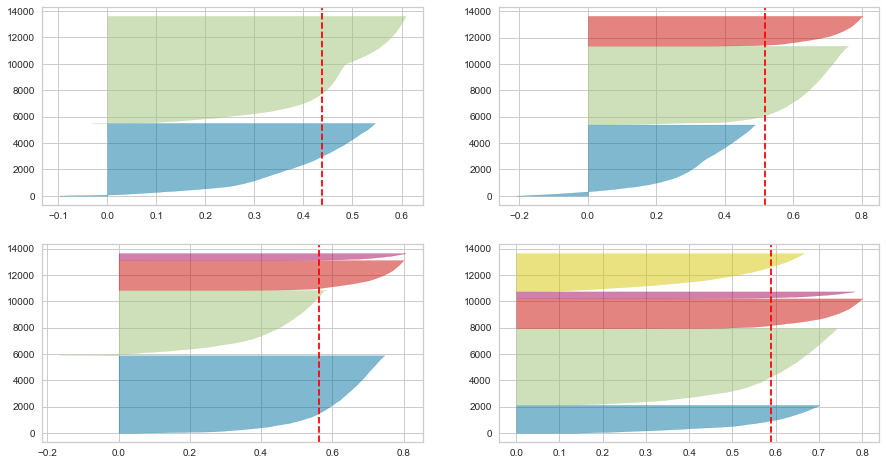

In [201]:
#!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2,3,4,5]:
    km = KMeans(n_clusters = i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(PCA_components)

In [203]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(PCA_components)
    silhouette_avg = silhouette_score(PCA_components, cluster_labels)
    print("For n clusters =", n_clusters,"The average silhouette_score is:", silhouette_avg)
    

For n clusters = 2 The average silhouette_score is: 0.4372536600707733
For n clusters = 3 The average silhouette_score is: 0.5169045189192122
For n clusters = 4 The average silhouette_score is: 0.5631759210393834
For n clusters = 5 The average silhouette_score is: 0.5890513646581456
For n clusters = 6 The average silhouette_score is: 0.5003184806782138
For n clusters = 7 The average silhouette_score is: 0.46965213568266695
For n clusters = 8 The average silhouette_score is: 0.44394579733059775
For n clusters = 9 The average silhouette_score is: 0.39356745285926803
For n clusters = 10 The average silhouette_score is: 0.36740268171425355
For n clusters = 11 The average silhouette_score is: 0.3708423693755671
For n clusters = 12 The average silhouette_score is: 0.36072150591166485
For n clusters = 13 The average silhouette_score is: 0.35163713524562584
For n clusters = 14 The average silhouette_score is: 0.353487440913929
For n clusters = 15 The average silhouette_score is: 0.355531173254

In [ ]:
#As evidenced by the silhouette scores above, 5 clusters is optimal for this dataset